**BASIC MNIST EXAMPLE WITH MLP**

In [1]:
!pip install tensorflow-gpu==2.8.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 497.9 MB 33 kB/s 
     |████████████████████████████████| 462 kB 66.4 MB/s 
     |████████████████████████████████| 5.8 MB 58.3 MB/s 
     |████████████████████████████████| 1.4 MB 61.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of th

In [2]:
!nvidia-smi

Wed Nov 30 17:46:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Imports...

In [3]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization as BN
from keras.layers import GaussianNoise as GN
from keras.layers import Activation
from keras.layers import Reshape
from keras.layers import RandomTranslation as RT
from keras.layers import RandomRotation as RR
from tensorflow.keras.optimizers import SGD, Adam
from keras.utils import np_utils

Define batch size, number of epochs and number of classes


In [4]:
batch_size = 128
epochs = 200
num_classes=10

Load MNIST and transform

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('training set', x_train.shape)
print('test set', x_test.shape)

x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize [0..255]-->[0..1]
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
training set (60000, 28, 28)
test set (10000, 28, 28)


Define the NN topology, a sequential model with 2 hidden layers

In [6]:
model = Sequential()
model.add(RR(factor=0.05,fill_mode='constant'))
model.add(RT(height_factor=(-0.1,0.1),width_factor=(-0.1,0.1),fill_mode='constant'))
model.add(Reshape(target_shape=(784,), input_shape=(28,28,1)))
model.add(GN(0.3))
model.add(Dense(1024, input_shape=(784,)))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))
model.add(Dense(1024))
model.add(BN())
model.add(GN(0.3))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation='softmax'))


#model.summary()


Define an optimizer 

In [7]:
sgd=SGD(learning_rate=0.01, decay=1e-6, momentum=0.9)

Compile the model, define loss and link the optimizer

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

Finally, train the model and evaluate over the test data

In [9]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# Evaluate over test
score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/200
469/469 [==============================] - 11s 14ms/step - loss: 0.8131 - accuracy: 0.7289 - val_loss: 0.1644 - val_accuracy: 0.9467
Epoch 2/200
469/469 [==============================] - 4s 9ms/step - loss: 0.4499 - accuracy: 0.8541 - val_loss: 0.1143 - val_accuracy: 0.9634
Epoch 3/200
469/469 [==============================] - 3s 7ms/step - loss: 0.3725 - accuracy: 0.8795 - val_loss: 0.0938 - val_accuracy: 0.9706
Epoch 4/200
469/469 [==============================] - 3s 7ms/step - loss: 0.3311 - accuracy: 0.8941 - val_loss: 0.0876 - val_accuracy: 0.9698
Epoch 5/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2983 - accuracy: 0.9045 - val_loss: 0.0743 - val_accuracy: 0.9745
Epoch 6/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2840 - accuracy: 0.9095 - val_loss: 0.0701 - val_accuracy: 0.9762
Epoch 7/200
469/469 [==============================] - 3s 7ms/step - loss: 0.2679 - accuracy: 0.9129 - val_loss: 0.0609 - val_accuracy: 0.97

In [10]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [11]:
import matplotlib.pyplot as plt



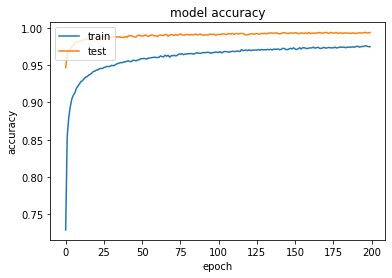

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()